# Segmentación de clientes

La segmentación de clientes es una tarea relevante que pretende
identificar los diferentes grupos de clientes que tiene una empresa.
La segmentación puede hacerse atendiendo a criterios demográficos,

geográficos, de comportamiento de compra o usando una combi-
nación de ellos.

Se hace uso de una base de datos denominada como mallCustomers.csv la cual contiene datos de 200 clientes de un centro comercial. Los datos constan de 5 variables, incluyendo el identificador de cada cliente. Estas variables quedan representadas en la siguiente tabla:

| Variable | Descripción | Valores
| --- | --- | --- |
| CustomerID | Identificador del cliente | Numérico |
| Gender | Género del cliente | Male / Female |
| Age | Edad del cliente | Numérico |
| Annual.income | Ingresos anuales del cliente | Numérico |
| Spending.score | Puntuación dada al cliente por el supermercado | Numérico |


## Tareas a realizar

a. Aplicando el algoritmo k-means, identificar un buen agrupamiento de los clientes fijando adecuadamente el valor de k.

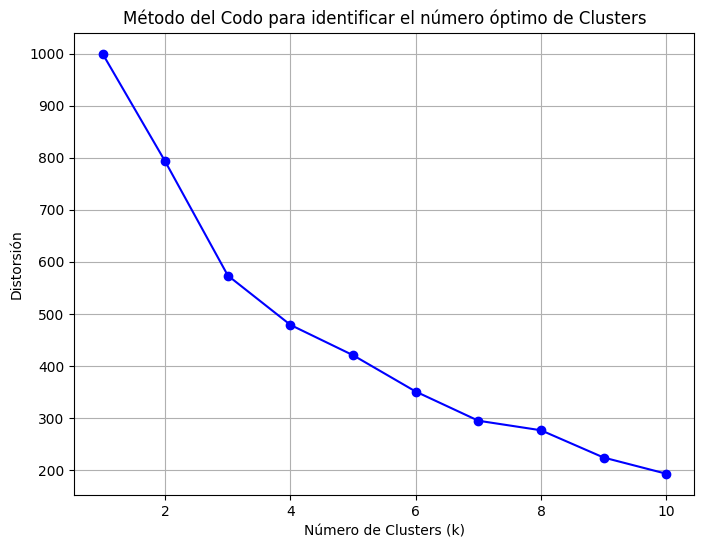

In [6]:
# Importación de librerías
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Carga del dataset
dataset = pd.read_csv('../data/Base de datos - mallCustomers.csv')

# Convertir la columna 'Gender' a valores numéricos ya que la librería de scikit-learn no acepta variables categóricas
label_encoder = LabelEncoder()
dataset['Genre'] = label_encoder.fit_transform(dataset['Genre'])

# Escalado de los datos para mejorar el rendimiento del algoritmo k-means
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset)

# Método del codo para determinar el valor óptimo de k
distortions = []
K = range(1, 11)  # Prueba valores de k de 1 a 10
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bo-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Distorsión')
plt.title('Método del Codo para identificar el número óptimo de Clusters')
plt.grid(True)
plt.show()


In [7]:
# Teniendo en cuenta el gráfico del codo anterior, se puede determinar que el número óptimo de clusters para este caso es de 8
k_optimo = 8
kmeans = KMeans(n_clusters=k_optimo, random_state=0).fit(scaled_features)
dataset['cluster'] = kmeans.labels_

# Impresión de los datos agrupados
print(dataset)

     CustomerID  Genre  Age  Annual Income  Spending Score  cluster
0             1      1   19             15              39        6
1             2      1   21             15              81        6
2             3      0   20             16               6        4
3             4      0   23             16              77        3
4             5      0   31             17              40        3
..          ...    ...  ...            ...             ...      ...
195         196      0   35            120              79        7
196         197      0   45            126              28        2
197         198      1   32            126              74        5
198         199      1   32            137              18        2
199         200      1   30            137              83        5

[200 rows x 6 columns]


b. Construir los dendrogramas de los agrupamientos jerárquicos que se obtienen usando los métodos single, centroid y ward. Comparar los dendrogramas obtenidos para identificar el que preserva mejor las distancias originales. Usar este dendrograma para agrupar a los clientes.

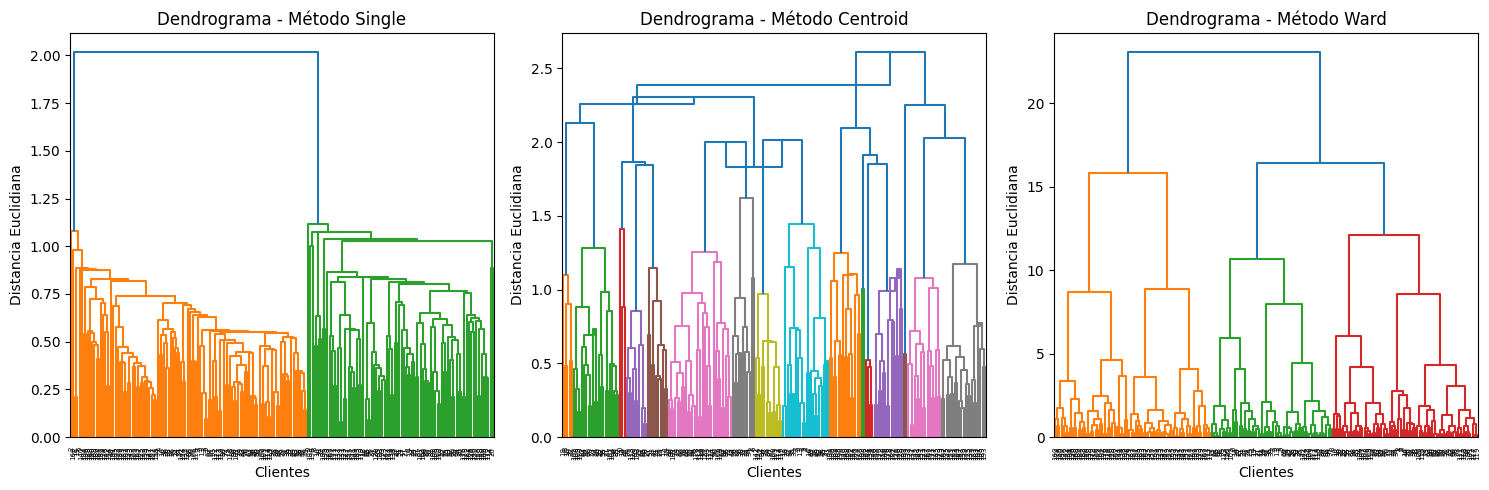

In [11]:
# Construcción y visualización de dendrogramas para los métodos single, centroid y ward
methods = ['single', 'centroid', 'ward']

plt.figure(figsize=(15, 5))

for i, method in enumerate(methods):
    plt.subplot(1, 3, i + 1)
    dendrogram = sch.dendrogram(sch.linkage(scaled_features, method=method))
    plt.title(f'Dendrograma - Método {method.capitalize()}')
    plt.xlabel('Clientes')
    plt.ylabel('Distancia Euclidiana')

plt.tight_layout()
plt.show()